# Inisiasi Data dan Null Checking

In [1]:
#import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import pearsonr
from scipy.stats import spearmanr
import statistics

In [2]:
from google.colab import files
uploaded = files.upload()

Saving application_train.csv to application_train.csv


In [5]:
#inisiasi data
data = pd.read_csv('application_train.csv')
data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
data.isna().sum()
#terdapat beberapa variable yang memiliki null value. Data-data null akan di drop

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

In [7]:
#drop data-data null
df = data.dropna()
df.isna().sum()

SK_ID_CURR                    0
TARGET                        0
NAME_CONTRACT_TYPE            0
CODE_GENDER                   0
FLAG_OWN_CAR                  0
                             ..
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_QRT     0
AMT_REQ_CREDIT_BUREAU_YEAR    0
Length: 122, dtype: int64

In [63]:
from google.colab import files
df.to_excel('df_clean.xls') 
files.download('df_clean.xls')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 1. Untuk feature/column AMT_INCOME_TOTAL & AMT_CREDIT, hitung dan beri penjelasan (insight) terkait:
*   Titik Pusat Data (central Tendency)
*   Persebaran Data (Dispersion)
*   Distribusi Data (Distribution)

AMT_INCOME_TOTAL

Titik Pusat Data
Rata-rata AMT_INCOME_TOTAL =  222872.41443850266
Median AMT_INCOME_TOTAL =  193500.0
Modus AMT_INCOME_TOTAL =  225000.0 sebanyak 883 data

Titik Persebaran Data
1st Quartile =  135000.0
2nd Quartile =  193500.0
3rd Quartile =  270000.0

Distribusi data


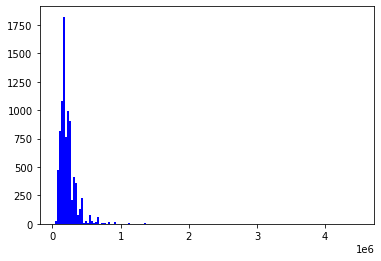

In [13]:
#Analisa data untuk AMT_INCOME_TOTAL
print('Titik Pusat Data')
df_income = df ['AMT_INCOME_TOTAL'].sort_values()
df_income_desc = df_income.describe()
df_income_desc.loc['mode'] = statistics.mode(df_income)
print('Rata-rata AMT_INCOME_TOTAL = ',df_income_desc['mean'])
print('Median AMT_INCOME_TOTAL = ',df_income_desc['50%'])
df_income_mode_value = pd.DataFrame(df_income.value_counts())
print('Modus AMT_INCOME_TOTAL = ',df_income_desc['mode'],'sebanyak 883 data')
print()
print('Titik Persebaran Data')
print('1st Quartile = ',df_income_desc['25%'])
print('2nd Quartile = ',df_income_desc['50%'])
print('3rd Quartile = ',df_income_desc['75%'])
print()
print('Distribusi data')
fig,ax = plt.subplots()
ax.hist(df_income,bins=150,color='blue')
plt.show()

Berdasarkan analisa yang telah dilakukan diketahui bahwa rata-rata dari data total income adalah sebesar 222,872.41443850266 dengann nilai tengah 193,500 dan modus 225,000 sebanyak 833 data. Dikarenakan nilai median yang lebih kecil dari nilai rata-rata maka dapat disimpulkan bahwa data total income memiliki karakteristik right skeweness. Hal ini juga dapat dilihat dari bentuk histogram yang landai ke arah kanan.

AMT_CREDIT

Titik Pusat Data
Rata-rata AMT_CREDIT =  699998.7016391536
Median AMT_CREDIT =  585000.0
Modus AMT_CREDIT =  450000.0 sebanyak 289 data

Titik Persebaran Data
1st Quartile =  315000.0
2nd Quartile =  585000.0
3rd Quartile =  958144.5

Distribusi data


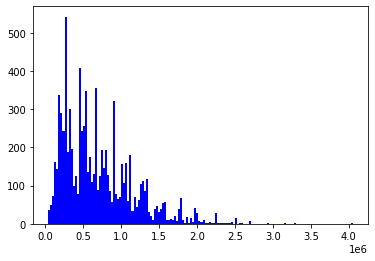

In [20]:
#Analisa data untuk AMT_CREDIT
print('Titik Pusat Data')
df_credit = df ['AMT_CREDIT'].sort_values()
df_credit_desc = df_credit.describe()
df_credit_desc.loc['mode'] = statistics.mode(df_credit)
print('Rata-rata AMT_CREDIT = ',df_credit_desc['mean'])
print('Median AMT_CREDIT = ',df_credit_desc['50%'])
df_credit_mode_value = pd.DataFrame(df_credit.value_counts())
print('Modus AMT_CREDIT = ',df_credit_desc['mode'],'sebanyak 289 data')
print()
print('Titik Persebaran Data')
print('1st Quartile = ',df_credit_desc['25%'])
print('2nd Quartile = ',df_credit_desc['50%'])
print('3rd Quartile = ',df_credit_desc['75%'])
print()
print('Distribusi data')
fig,ax = plt.subplots()
ax.hist(df_credit,bins=150,color='blue')
plt.show()

Berdasarkan analisa yang telah dilakukan diketahui bahwa rata-rata dari data credit amount adalah sebesar 699,998.7016391536 dengann nilai tengah 585,000 dan modus 450,000 sebanyak 289 data. Dikarenakan nilai median yang lebih kecil dari nilai rata-rata maka dapat disimpulkan bahwa data total income memiliki karakteristik right skeweness. Hal ini juga dapat dilihat dari bentuk histogram yang landai ke arah kanan.

# 2. Carilah data outlier dan beri penjelasan (insight) pada feature/column DAYS_EMPLOYED ! Tambahkan plot untuk menampilkan adanya data outlier!

Batas Atas Days Employed =  2656.25
Batas Bawah Days Employed =  -6605.75
Total data yang outliers untuk data days_employed sebanyak 428 data

Data days_employed yang outlier adalah:
-8412     3
-6727     2
-6724     2
-6990     2
-7352     2
         ..
-13020    1
-6877     1
-6885     1
-6892     1
-9220     1
Name: DAYS_EMPLOYED, Length: 400, dtype: int64


<function matplotlib.pyplot.show>

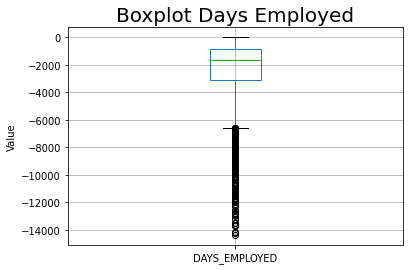

In [24]:
q1 = df['DAYS_EMPLOYED'].quantile(0.25)
q3 = df['DAYS_EMPLOYED'].quantile(0.75)
iqr = q3 - q1
lower = q1-(1.5*iqr)
upper = q3+(1.5*iqr)
print('Batas Atas Days Employed = ', upper)
print('Batas Bawah Days Employed = ', lower)
outliers = df[(df['DAYS_EMPLOYED']>upper) | (df['DAYS_EMPLOYED']<lower)]
print('Total data yang outliers untuk data days_employed sebanyak',outliers.DAYS_EMPLOYED.count(),'data')
print()
print('Data days_employed yang outlier adalah:')
print(outliers.DAYS_EMPLOYED.value_counts())
df.boxplot(column ='DAYS_EMPLOYED')
plt.title('Boxplot Days Employed', size = 20)
plt.ylabel('Value', size = 10)
plt.show

Berdasarkan pengolahan data yang telah dilakukan, diketahui bahwa terdapat 428 data yang outliers. Batas maksimal memiliki value 2656.25 dan batas bawah memiliki value -6605.75. Berdasarkan boxplot yang telah dibuat, 428 data yang outliers memiliki value lebih kecil dari batas bawah data.

# 3. Tampilkan distribusi (sebaran data) dalam bentuk plot yang tepat, untuk feature/column DAYS_BIRTH. Jelaskan insight apa yang Anda dapatkan di setiap plot tersebut!

count     8602.000000
mean    -14189.009416
std       3259.202657
min     -24835.000000
25%     -16299.750000
50%     -13883.500000
75%     -11664.500000
max      -7715.000000
mode    -11408.000000
Name: DAYS_BIRTH, dtype: float64


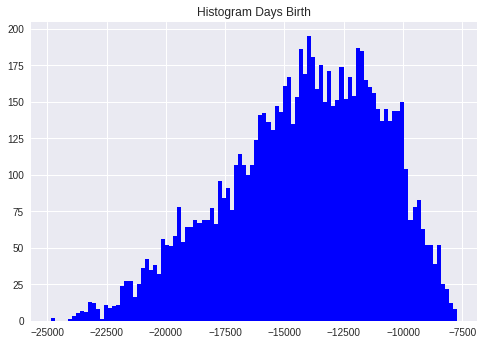

In [31]:
#Analisa Data
df_birth = df ['DAYS_BIRTH'].sort_values()
df_birth_desc = df_birth.describe()
df_birth_desc.loc['mode'] = statistics.mode(df_birth)
print(df_birth_desc)
plt.style.use('seaborn')
fig,ax =plt.subplots()
ax.hist(df['DAYS_BIRTH'],bins=100,color='blue')
plt.title('Histogram Days Birth')
plt.show()

Berdasarkan pengolahan data telah dilakukan, diketahui bahwa terdapat 8602 data days birth pada dataset application train yang bernilai tidak null. Nilai maksimal dari data days birth adalah -7715 dan nilai minimal dari data days birth adalah -24385. Dikarenakan nilai median lebih besar dari mean, yaitu -13883.500000 > -14189.009416 maka dapat disimpulkan bahwa data days birth karakteristik left skeweness. Hal ini juga dapat dilihat dari bentuk histogram yang landai ke arah kiri.

# 4. Buatlah plot yang tepat mengenai kelompok umur yang gagal melakukan pembayaran. Untuk umur bisa menggunakan variabel DAYS_BIRTH dan identifier apakah orang tersebut gagal melakukan pembayaran adalah TARGET. Kelompok umur adalah tiap 5 tahun. Ex : 20-25 tahun, 26-30 tahun, etc. Jelaskan (insight) dari plot yang Anda buat!

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:5170: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

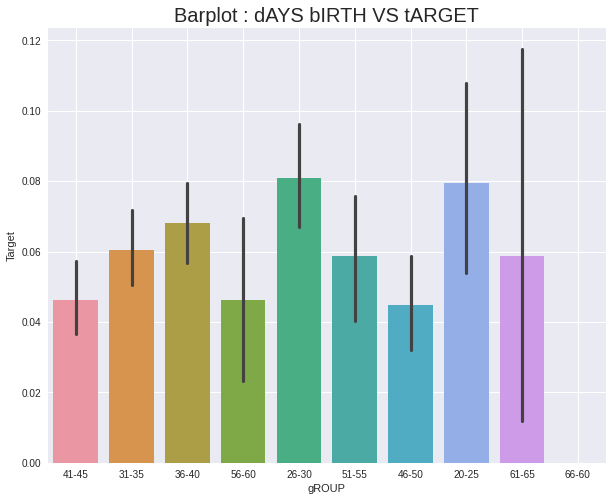

In [107]:
days_birth_col = df[['TARGET','DAYS_BIRTH']]
days_birth_col['days_birth_new']=(days_birth_col['DAYS_BIRTH']/365).round()*-1
days_birth_col.days_birth_new=days_birth_col.days_birth_new.astype(int)
conditions= [(days_birth_col['days_birth_new'] >20) & (days_birth_col['days_birth_new'] <=25),
             (days_birth_col['days_birth_new'] >25) & (days_birth_col['days_birth_new'] <=30),
             (days_birth_col['days_birth_new'] >30) & (days_birth_col['days_birth_new'] <=35),
             (days_birth_col['days_birth_new'] >35) & (days_birth_col['days_birth_new'] <=40),
             (days_birth_col['days_birth_new'] >40) &  (days_birth_col['days_birth_new'] <=45),
             (days_birth_col['days_birth_new'] >45) & (days_birth_col['days_birth_new'] <=50),
             (days_birth_col['days_birth_new'] >50) & (days_birth_col['days_birth_new'] <=55),
             (days_birth_col['days_birth_new'] >55) & (days_birth_col['days_birth_new'] <=60),
             (days_birth_col['days_birth_new'] >60) & (days_birth_col['days_birth_new'] <=65),
             (days_birth_col['days_birth_new'] >65) & (days_birth_col['days_birth_new'] <=70)
]
values = ['20-25','26-30','31-35','36-40','41-45','46-50','51-55','56-60','61-65','66-60']
days_birth_col['group']=np.select(conditions,values)
days_birth_col.head()
plt.figure(figsize=(10,8))
sns.barplot(data=days_birth_col, x='group',y='TARGET')
plt.title('Barplot : dAYS bIRTH VS tARGET',size = 20)
plt.grid(True)
plt.xlabel('gROUP')
plt.ylabel('Target')
plt.show()

# 5. Di antara NAME_INCOME_TYPE, DAYS_BIRTH, & REGION_RATING_CLIENT_W_CITY, manakah feature/column yang memiliki nilai korelasi tertinggi pada feature/column TARGET? Jelaskan metode korelasi apa yang Anda gunakan, serta apa insight untuk perusahaan setelah mengetahui nilai korelasi tersebut?

In [82]:
new_1 = df.copy()
new_1
for value in new_1['NAME_INCOME_TYPE']:
  if value =='Working':
    new_1["NEW_NAME_INCOME_TYPE"] = 1
  elif value=='Commercial associate':
    new_1["NEW_NAME_INCOME_TYPE"] = 2
  elif value=='State servant':
    new_1["NEW_NAME_INCOME_TYPE"]= 3
print(new_1['NEW_NAME_INCOME_TYPE'].value_counts())   

2    8602
Name: NEW_NAME_INCOME_TYPE, dtype: int64


In [34]:
#Analisa Data
# print(stats.normaltest(df['NAME_INCOME_TYPE']))
print(stats.normaltest(df['DAYS_BIRTH']))
print(stats.normaltest(df['REGION_RATING_CLIENT_W_CITY']))
print(stats.normaltest(df['TARGET']))
# corr_land,_ = spearmanr(df['Price'],df['Landsize'])
# corr_dist,_ = spearmanr(df['Price'],df['Distance'])
# corr_rooms,_ = spearmanr(df['Price'],df['Rooms'])
# print('Spearman correlation Price vs Landsize: %3f' %corr_land)
# print('Spearman correlation Price vs Distance: %3f' %corr_dist)
# print('Spearman correlation Price vs Rooms: %3f' %corr_rooms)
# plt.figure(figsize=(8,8))
# corr = df[['Price','Landsize','Distance','Rooms']].corr(method = 'spearman')
# sns.heatmap(corr*100, cmap="YlGn", annot= True, fmt=".0f")
# plt.show()

NormaltestResult(statistic=348.0205252661734, pvalue=2.6810390764146044e-76)
NormaltestResult(statistic=22.84510348532203, pvalue=1.0945832774654828e-05)
NormaltestResult(statistic=6285.895438219445, pvalue=0.0)


# 6. Temukan NAME_INCOME_TYPE yang rata-rata income (AMT_INCOME_TOTAL) paling tinggi, serta tampilkan NAME_INCOME_TYPE dan rata-rata salary dalam bentuk Barplot! Lalu carilah:

       NAME_INCOME_TYPE  AMT_INCOME_TOTAL
0  Commercial associate     258114.943054
1         State servant     217968.234637
2               Working     203776.093960


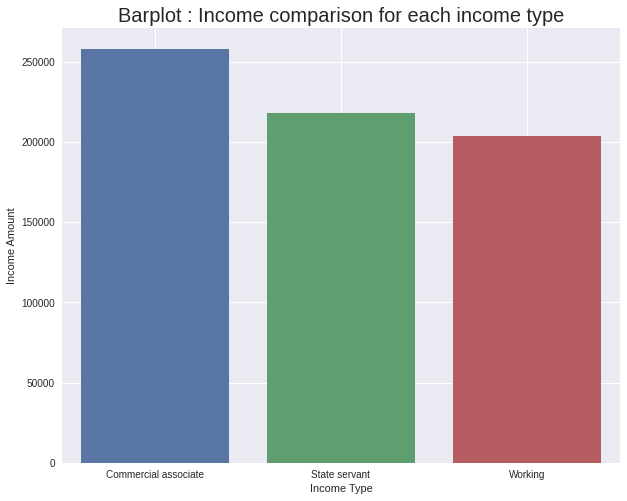

In [60]:
df_mean = df[['NAME_INCOME_TYPE','AMT_INCOME_TOTAL']].groupby(by='NAME_INCOME_TYPE').mean().sort_values(by='AMT_INCOME_TOTAL',ascending=False)
df_mean = df_mean.reset_index()
print(df_mean)
plt.figure(figsize=(10,8))
sns.barplot(data=df_mean, x='NAME_INCOME_TYPE',y='AMT_INCOME_TOTAL')
plt.title('Barplot : Income comparison for each income type',size = 20)
plt.grid(True)
plt.xlabel('Income Type')
plt.ylabel('Income Amount')
plt.show()

Berdasarkan barplot : Income comparison for each income type diketahui bahwa tipe income dengan rata-rata nilai salary terbesar adalah commercial associat dengan value 258,114.943054 

Tiga NAME_EDUCATION_TYPE yang memiliki rata-rata salary tertinggi!

In [48]:
df_type_max = df[df['NAME_INCOME_TYPE']=='Commercial associate']
df_edu_max = df_type_max[['NAME_EDUCATION_TYPE','AMT_INCOME_TOTAL']].groupby(by='NAME_EDUCATION_TYPE').mean().sort_values(by='AMT_INCOME_TOTAL',ascending=False)
df_edu_max.head(3)

,AMT_INCOME_TOTAL
NAME_EDUCATION_TYPE,
Academic degree,315000.000000
Higher education,294019.149746
Incomplete higher,265085.160000


Berdasarkan pengolahan data yang telah dilakukan, diketahui top 3 tipe edukasi dengan nilai rata-rata salary tertinggi adalah academic degree, higher education dan incomplete higher. Oleh karena itu, untuk tipe income commercial associate dibutuhkan title academic agar bisa memiliki nilai income yang cukup tinggi

Lima tipe pekerjaan (OCCUPATION_TYPE) yang memiliki rata-rata salary tertinggi!

In [61]:
df_type_max = df[df['NAME_INCOME_TYPE']=='Commercial associate']
df_occu_max = df_type_max[['OCCUPATION_TYPE','AMT_INCOME_TOTAL']].groupby(by='OCCUPATION_TYPE').mean().sort_values(by='AMT_INCOME_TOTAL',ascending=False)
df_occu_max.head(5)

,AMT_INCOME_TOTAL
OCCUPATION_TYPE,
IT staff,394578.947368
Managers,340632.791139
Accountants,267804.850840
Private service staff,245968.085106
Drivers,243506.457565


Berdasarkan pengolahan data yang telah dilakukan diketahui bahwa top 5 tipe pekerjaan di commercial associate dengan rata-rata salary tertinggi adalah IT STAFF, managers, accountants, private service staff dan drivers.  IT staff memiliki peringkat paling tinggi, hal ini mungkin disebabkan oleh perkembangan teknologi yang semakin maju sehingga kebutuhan akan IT staff semakin tinggi juga. Selain itu, load kerja yang cukup besar juga menyebabkan IT staff memiliki nilai salary yang paling tinggi. 

Tiga status perkawinan (NAME_FAMILY_STATUS) yang paling sering dilakukan!

In [62]:
df_mode_fam_stat_count = df_type_max['NAME_FAMILY_STATUS'].value_counts()
print(df_mode_fam_stat_count.head(3))

Married                 1997
Single / not married     415
Civil marriage           237
Name: NAME_FAMILY_STATUS, dtype: int64


Berdasarkan pengolahan data yang telah dilakukan, diketahui bahwa 3 status perkawinan yang paling sering dilakukan adalah married, single dan civil married. Individu yang sudah menikah secara general akan memiliki tingkat kebutuhan yang lebih tinggi. Oleh karena itu jumlah individu yang sudah menikah paling banyak jumlahnya dibandingkan individu dengan marital status lainnya. 